In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')
submission = pd.read_csv('titanic/gender_submission.csv')

,Survived
Pclass,
3,491
1,216
2,184


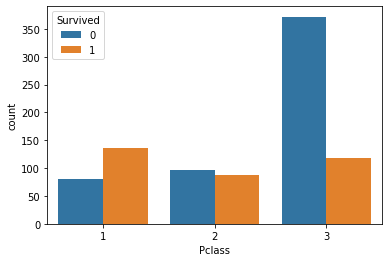

In [31]:
ax = sns.countplot(x="Pclass", hue="Survived", data=train)
train[['Pclass', 'Survived']].groupby(['Pclass']).count().sort_values(by = 'Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


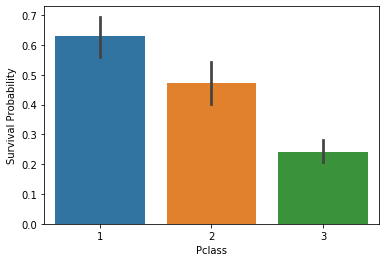

In [33]:
g = sns.barplot(x="Pclass",y="Survived",data=train)
g = g.set_ylabel("Survival Probability")
train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by = 'Survived', ascending=False)

* Approximately 62% of Pclass = 1 passenger survived followed by 47% of Pclass2.

,Survived
Sex,
female,233
male,109


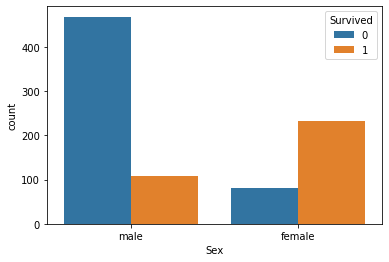

In [36]:
ax = sns.countplot(x="Sex", hue="Survived", data=train)
train[["Sex", "Survived"]].groupby(['Sex']).sum().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


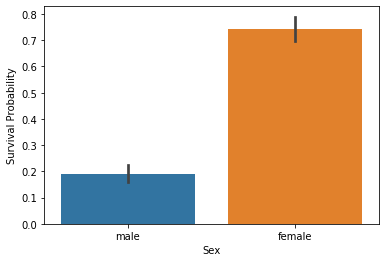

In [54]:
g = sns.barplot(x="Sex",y="Survived",data=train)
g = g.set_ylabel("Survival Probability")
train[["Sex", "Survived"]].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

/home/nunoferreira/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/nunoferreira/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


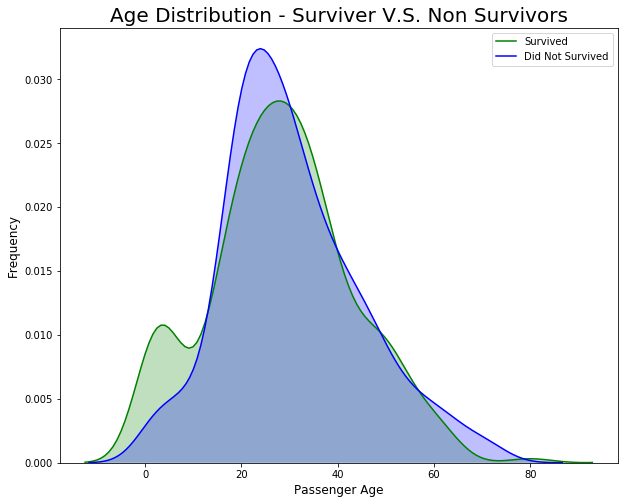

In [37]:
# Let's explore the distribution of age by response variable (Survived)
fig = plt.figure(figsize=(10,8),)
axis = sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='Survived')
axis = sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='b',shade=True,label='Did Not Survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 20)
plt.xlabel("Passenger Age", fontsize = 12)
plt.ylabel('Frequency', fontsize = 12);

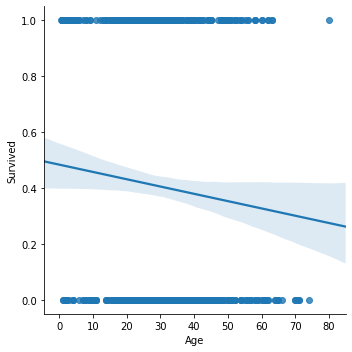

In [38]:
sns.lmplot('Age','Survived',data=train)

# We can also say that the older the passenger the lesser the chance of survival

,Survived
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


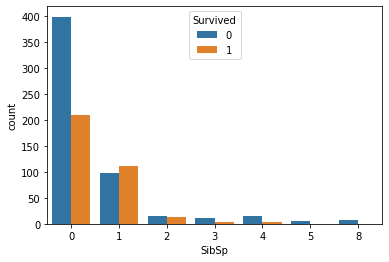

In [43]:
# Analyze the count of survivors by SibSP

ax = sns.countplot(x="SibSp", hue="Survived", data=train)
train[['SibSp', 'Survived']].groupby(['SibSp']).count().sort_values(by='Survived', ascending=False)

/home/nunoferreira/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/nunoferreira/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


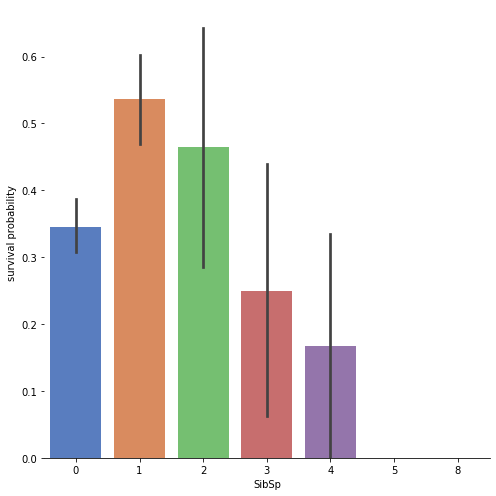

In [44]:
# Analyze probability of survival by SibSP
g  = sns.factorplot(x="SibSp",y="Survived",data=train,kind="bar", size = 7 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")
train[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
0,678
1,118
2,80
3,5
5,5
4,4
6,1


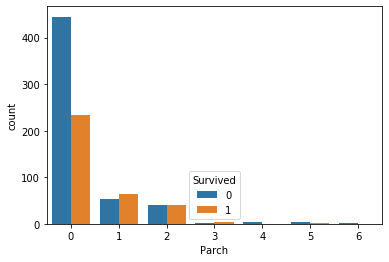

In [46]:
# Analyze the count of survivors by Parch

ax = sns.countplot(x="Parch", hue="Survived", data=train)
train[['Parch', 'Survived']].groupby(['Parch']).count().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


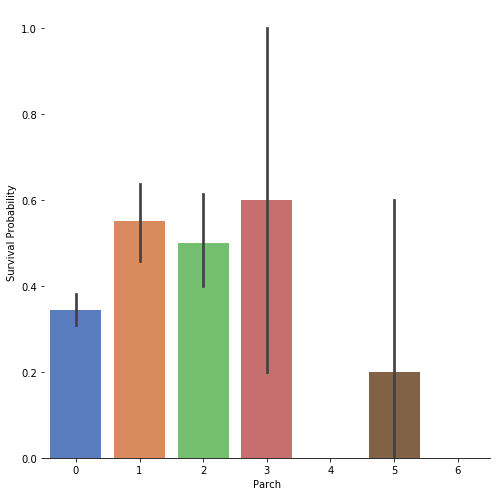

In [47]:
# Analyze the Survival Probability by Parch
g  = sns.factorplot(x="Parch",y="Survived",data=train,kind="bar", size = 7 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")
train[["Parch", "Survived"]].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)


 mu = 32.20 and sigma = 49.67



Text(0.5, 1.0, 'Fare distribution')

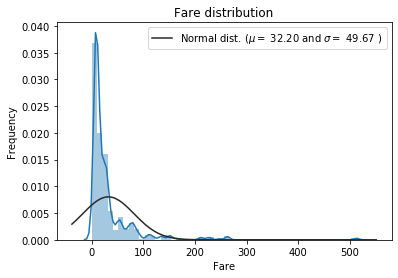

In [48]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
sns.distplot(train['Fare'] , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Fare'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Fare distribution')

* The Fare variable is right skewed. We need to transform this variable using log function and make it more normally distributed. We will do this during feature engineering process.


,Survived
Embarked,
S,644
C,168
Q,77


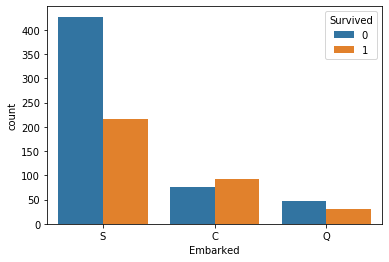

In [49]:
# Analyze the count of survivors by Embarked variable
ax = sns.countplot(x="Embarked", hue="Survived", data=train)
train[['Embarked', 'Survived']].groupby(['Embarked']).count().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


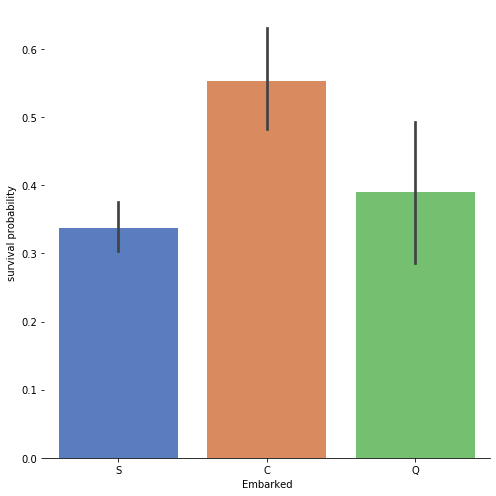

In [57]:
# Analyze the Survival Probability by Embarked
g  = sns.factorplot(x="Embarked",y="Survived",data=train,kind="bar", size = 7 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")
train[["Embarked", "Survived"]].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False)

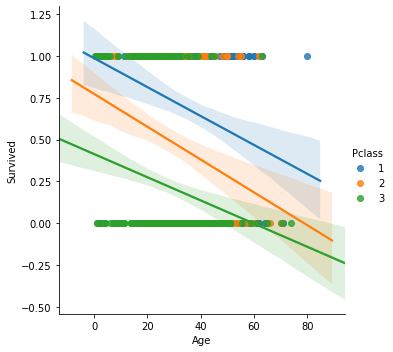

In [58]:
# Age, Pclass & Survival
sns.lmplot('Age','Survived',data=train,hue='Pclass')

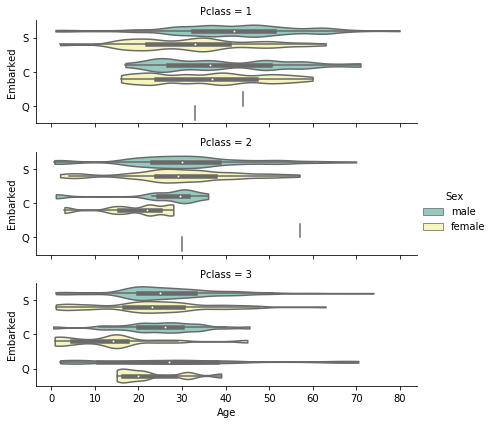

In [59]:
# Age, Embarked, Sex, Pclass
g = sns.catplot(x="Age", y="Embarked",  hue="Sex", row="Pclass",   data=train[train.Embarked.notnull()], 
orient="h", height=2, aspect=3, palette="Set3",  kind="violin", dodge=True, cut=0, bw=.2)

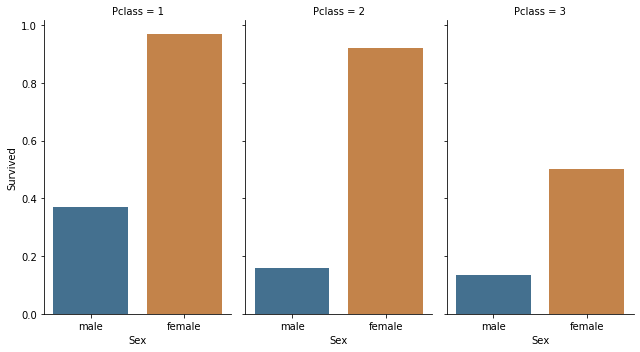

In [60]:
# Relation among Pclass, Gender & Survival Rate
g = sns.catplot(x="Sex", y="Survived", col="Pclass", data=train, saturation=.5, kind="bar", ci=None, aspect=.6)

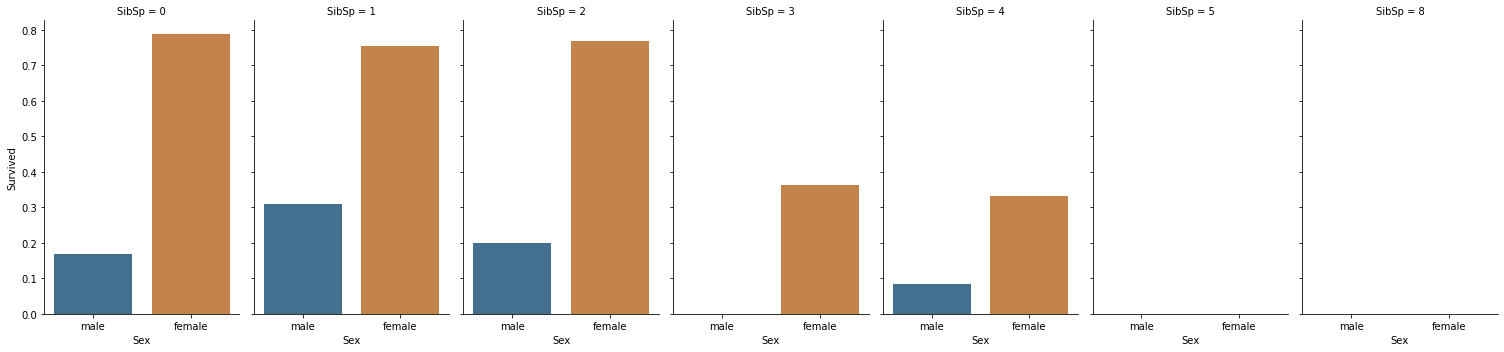

In [61]:
# Relation among SibSP, Gender & Survival Rate
g = sns.catplot(x="Sex", y="Survived", col="SibSp", data=train, saturation=.5,kind="bar", ci=None, aspect=.6)